In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load dataframes

In [9]:
# Define the path to the directory containing the CSV files
data_dir = "ERC20-stablecoins"

# List of CSV files
csv_files = ["token_transfers.csv"]

# Dictionary to hold dataframes
dfs = {}

# Read each CSV file into a dataframe
for csv_file in csv_files:
    path = os.path.join(data_dir, csv_file)
    df = pd.read_csv(path)
    print(df.columns)

df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')

# Define a mapping for contract addresses to stablecoin labels
contract_address_mapping = {
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC',
    '0x6b175474e89094c44da98b954eedeac495271d0f': 'DAI',
    '0xa47c8bf37f92abed4a126bda807a7b7498661acd' : 'UST',
    '0x8e870d67f660d95d5be530380d0ec0bd388289e1': 'PAX',
    '0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9': 'WLUNA',

}


# Map the contract addresses to labels
df['stablecoin'] = df['contract_address'].map(contract_address_mapping)
df = df[df['stablecoin'] != 'WLUNA']

Index(['block_number', 'transaction_index', 'from_address', 'to_address',
       'time_stamp', 'contract_address', 'value'],
      dtype='object')


This csv contains transaction data for time period 28.4.2022. - 25.5.2022., which is the period in which terra luna collapse happened

In [11]:
print(df['time_stamp'].min())
print(df['time_stamp'].max())

df.head()

2022-04-28 00:30:15
2022-05-25 18:47:44


,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,stablecoin
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,2022-04-28 00:30:15,0xdac17f958d2ee523a2206206994597c13d831ec7,18.670000,USDT
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15,0xdac17f958d2ee523a2206206994597c13d831ec7,10000.000000,USDT
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15,0xdac17f958d2ee523a2206206994597c13d831ec7,9942.313005,USDT
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,2022-04-28 00:30:15,0xdac17f958d2ee523a2206206994597c13d831ec7,234.364097,USDT
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15,0xdac17f958d2ee523a2206206994597c13d831ec7,9800.000000,USDT


Plot the biggest transactions during this period

         block_number  transaction_index  \
3377129      14773673                 14   
3179114      14768531                 24   
4851391      14827304                 71   
2893307      14763042                209   
4019604      14793521                 10   

                                       from_address  \
3377129  0x5754284f345afc66a98fbb0a0afe71e0f007b949   
3179114  0x742d35cc6634c0532925a3b844bc454e4438f44e   
4851391  0x28c6c06298d514db089934071355e5743bf21d60   
2893307  0x3561a7448c5df417148ef61ace81650583cfc9fe   
4019604  0x742d35cc6634c0532925a3b844bc454e4438f44e   

                                         to_address          time_stamp  \
3377129  0xc6cde7c39eb2f0f0095f41570af89efc2c1ea828 2022-05-14 12:41:15   
3179114  0x5754284f345afc66a98fbb0a0afe71e0f007b949 2022-05-13 16:47:35   
4851391  0xf977814e90da44bfa03b6295a0616a897441acec 2022-05-23 03:41:26   
2893307  0x28c6c06298d514db089934071355e5743bf21d60 2022-05-12 20:01:17   
4019604  0x5754284f345afc66a9

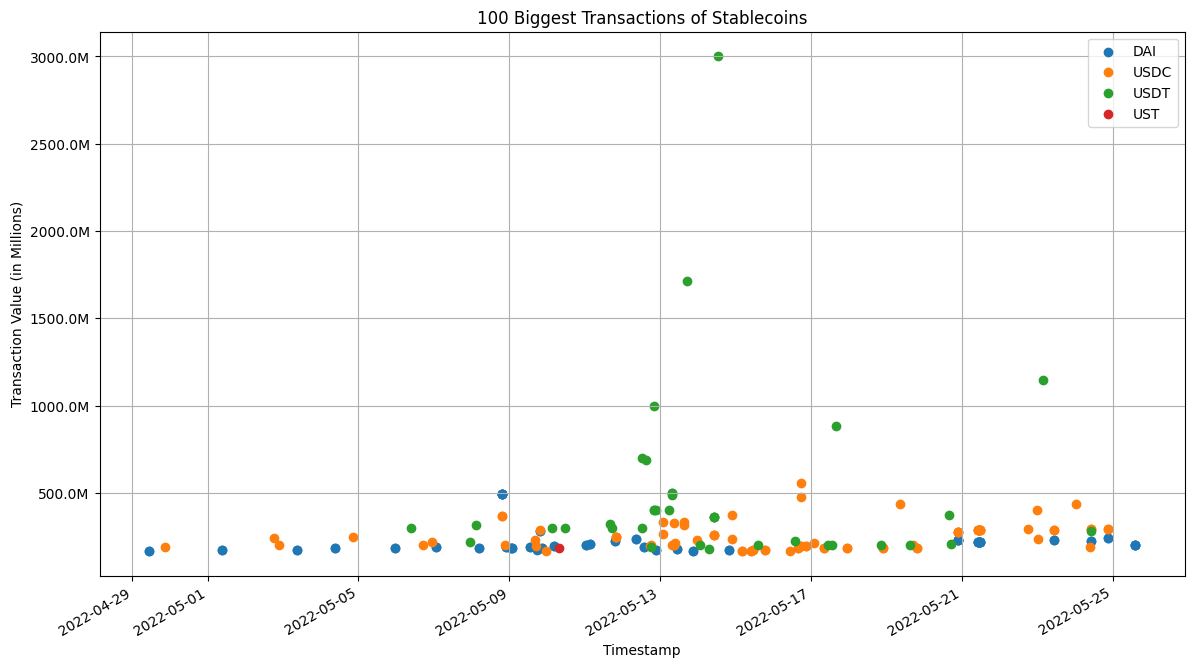

In [16]:
from matplotlib.ticker import FuncFormatter
# Find the 100 biggest transactions
biggest_transactions = df.nlargest(200, 'value')

print(biggest_transactions.head())
# Function to format y-axis in millions of dollars
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x * 1e-6:.1f}M'

# Create a formatter object
formatter = FuncFormatter(millions)

# Plot the biggest transactions
plt.figure(figsize=(14, 8))

for label, group in biggest_transactions.groupby('stablecoin'):
    plt.scatter(group['time_stamp'], group['value'], label=label)

plt.title('100 Biggest Transactions of Stablecoins')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Value (in Millions)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.show()